In [9]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('dataset.csv')
#showing our initial dataframe here
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,...,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,...,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,...,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,...,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,...,2,2,2,2,2,99,1,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,2,25,25,9,1,2020-06-02,2020-05-23,...,2,2,2,2,2,99,1,99,99,97
159789,USMER,SSA,22,1,22,22,12,2,2020-06-04,2020-06-02,...,2,2,2,2,2,2,1,99,99,2
159790,OUTSIDE USMER,SSA,12,2,12,12,50,1,2020-06-04,2020-06-03,...,2,2,1,2,2,1,1,99,99,97
159791,OUTSIDE USMER,IMSS,15,2,15,15,39,1,2020-06-04,2020-06-02,...,2,2,2,2,2,99,1,99,99,97


In [10]:
## Question 1
unmodified = dataframe.copy()

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [3]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'q1.csv')

### Question 2

<AxesSubplot:ylabel='Frequency'>

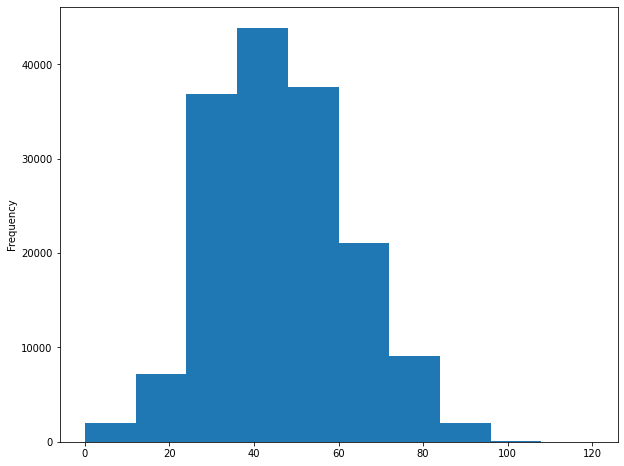

In [8]:
## Question 2
plt = dataframe["AGE"].plot(kind="hist", bins=10, figsize=(10,8))
plt.figure.savefig('Q2_histogram.png')
plt

### Question 3

In [6]:
## Question 3
bins = [0,10,20,30,40,50,60,70,80,90,100]

group = dataframe.groupby(['SEX',pd.cut(dataframe.AGE, bins)])
group.size().unstack()
#

AGE,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
SEX,,,,,,,,,,
Female,729,1888,11223,16390,16240,12388,7212,3628,1443,209
Male,783,1886,11823,19313,20026,17013,10241,5162,1691,216


### Question 4

In [7]:
## Question 4
filter = dataframe['INTUBATED'] == 'YES'
dataframe[filter].shape[0]

4828

### Question 5

In [12]:
## Question 5
diseases_and_ICU = list(['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 'ICU'])

In [13]:
corr_disease = unmodified[diseases_and_ICU].corr()
corr_disease

,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,ICU
DIABETES,1.000000,0.847660,0.853429,0.820727,0.854574,0.708794,-0.008068
COPD,0.847660,1.000000,0.930534,0.890390,0.877483,0.765948,-0.019711
ASTHMA,0.853429,0.930534,1.000000,0.907258,0.884746,0.777309,-0.023228
INMUSUPR,0.820727,0.890390,0.907258,1.000000,0.861896,0.805040,-0.023368
HYPERTENSION,0.854574,0.877483,0.884746,0.861896,1.000000,0.756025,-0.008134
OTHER_DISEASE,0.708794,0.765948,0.777309,0.805040,0.756025,1.000000,-0.033712
ICU,-0.008068,-0.019711,-0.023228,-0.023368,-0.008134,-0.033712,1.000000


<AxesSubplot:>

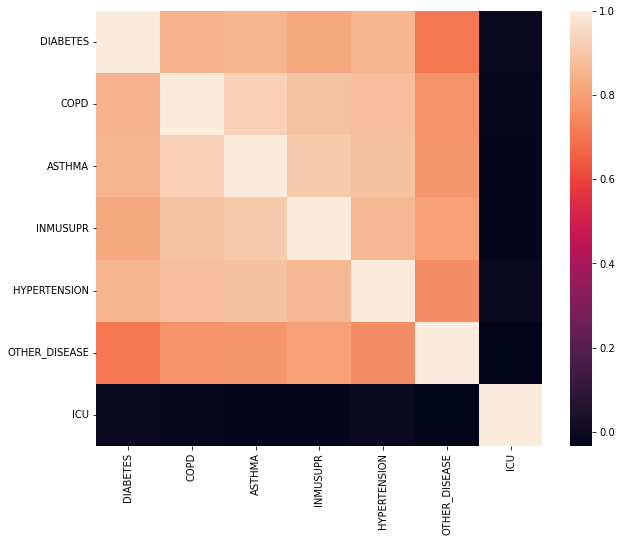

In [17]:
import seaborn as sns;
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr_disease)
heatmap.get_figure().savefig('Q5_heatmap.png')
heatmap

### Question 6

In [39]:
## Question 6
filter = dataframe['DATE_OF_DEATH'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()

'HYPERTENSION'

### Question 7

In [18]:
## Question 8
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [19]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [20]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [21]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [22]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [45]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [23]:
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [24]:
df1.shape

(51164, 32)

In [25]:
def split_date(df1):
    return df1.join(
        df1['ADMISSION DATE']
        # Split date
        .str.split('-', expand=True)
        .rename(columns={0: 'ADMISSION_YEAR', 1: 'ADMISSION_MONTH', 2: 'ADMISSION_DATE'})
    )

df1 = df1.pipe(split_date)

In [49]:
df1.drop(['ADMISSION DATE', 'BIRTHPLACE_LOCATION', 'DATE_OF_FIRST_SYMPTOM', 'DATE_OF_DEATH', 'MUNICIPALITY', 'COUNTRY OF ORIGIN'], axis=1, inplace=True)
df1.shape

(51164, 29)

In [26]:
df1['ADMISSION_YEAR'] = df1['ADMISSION_YEAR'].astype(str).astype(int)
df1['ADMISSION_MONTH'] = df1['ADMISSION_MONTH'].astype(str).astype(int)
df1['ADMISSION_DATE'] = df1['ADMISSION_DATE'].astype(str).astype(int)

In [51]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
PATIENT_LOCATION           int64
HOSPITALIZED              object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
ICU                        int64
ADMISSION_YEAR             int64
ADMISSION_MONTH            int64
ADMISSION_DATE             int64
dtype: object

In [27]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,TREATMENT_LOCATION,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,AGE,ICU,ADMISSION_YEAR,ADMISSION_MONTH,ADMISSION_DATE,ORIGIN_OUTSIDE USMER,...,COUNTRY OF ORIGIN_Cuba,COUNTRY OF ORIGIN_Egipto,COUNTRY OF ORIGIN_El Salvador,COUNTRY OF ORIGIN_Estados Unidos de América,COUNTRY OF ORIGIN_Ghana,COUNTRY OF ORIGIN_Grecia,COUNTRY OF ORIGIN_Guatemala,COUNTRY OF ORIGIN_Haití,COUNTRY OF ORIGIN_Otro,COUNTRY OF ORIGIN_República de Honduras
1,15,15,15,33,35,0,2020,5,18,1,...,0,0,0,0,0,0,0,0,0,0
5,15,15,15,99,79,0,2020,4,18,1,...,0,0,0,0,0,0,0,0,0,0
6,15,9,15,20,55,0,2020,5,5,1,...,0,0,0,0,0,0,0,0,0,0
7,15,15,15,19,66,0,2020,5,8,1,...,0,0,0,0,0,0,0,0,0,0
14,15,15,15,106,43,0,2020,6,4,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y = df1.ICU
X = df1.drop("ICU", 1)
colnames = X.columns
pd.DataFrame.to_csv(df1, 'cleaned.csv')

### Question 8

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1) 

rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

rf.fit(X_train, y_train)

accuracy_score(y_test, rf.predict(X_test))

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	399
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	373
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	373
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	373
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	373
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	376
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	376
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	376
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	376
Iteration: 	16 / 100
Confirmed: 	17
Tenta

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=126,
                                          random_state=RandomState(MT19937) at 0x7F1E52F8CB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F1E52F8CB40, verbose=2)

In [39]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [  1   1   1   1   1 366   1   5  16  12 229 366   1   1 240 102   7   1
 366   5   1   1  24  10  13 366 155 366 366 366 366 150  43 303 349 366
 320 366 297 328  87 310 315 123 110 345 327  85 269 203 244 157 221 128
 184 323 318 240   6  25 210 152 125 178 131 137 274  96 231 133  92 226
 175 160  37 255 146 212 240 192  77 281 182 224 164 306 283 149 159 220
 251 199 222 311 106  82 264 214 249 108 312 216 275 288 277 301 290 305
 142 226 261 303 270 211 291 219 218 246 153 169 148 137 139 176 143 271
 308 325 332 345 366 366 366 366 111 170 366 366 366  98 294 117 264 159
 284 215 293 309 278 117  21 337  62 335  94 233 171 336 190 257 201 307
 115 123  31 144  58  20 257 240 175 272  91  77  48 208  81 331  66 230
 120 210 185 184 102 104 107 121 260 242 112 192 265 187 224 218 262 286
 203 167 130  27 151 163 281 274 196 323 194 267 254 300 253 207 313 303
 281 234 268 299 189 104 244 276 237 186 207 258 148 237 192  73 228 100
 189 293 248 321 341 338 339 320 233 366 

In [40]:
boruta_score = ranking(list(map(float, boruta_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)
pd.DataFrame.to_csv(boruta_score, 'Boruta_Score.csv')

In [41]:
print('---------Top 20----------')
display(boruta_score.head(20))

---------Top 20----------


,Features,Score
0,TREATMENT_LOCATION,1.0
20,SECTOR_SEMAR,1.0
377,ANOTHER CASE_NO,1.0
17,SECTOR_PRIVATE,1.0
334,INTUBATED_NO,1.0
335,INTUBATED_YES,1.0
378,ANOTHER CASE_UNKNOWN,1.0
13,SECTOR_ISSSTE,1.0
12,SECTOR_IMSS,1.0
379,ANOTHER CASE_YES,1.0


Text(0.5, 1.0, 'Boruta Top 20 Features')

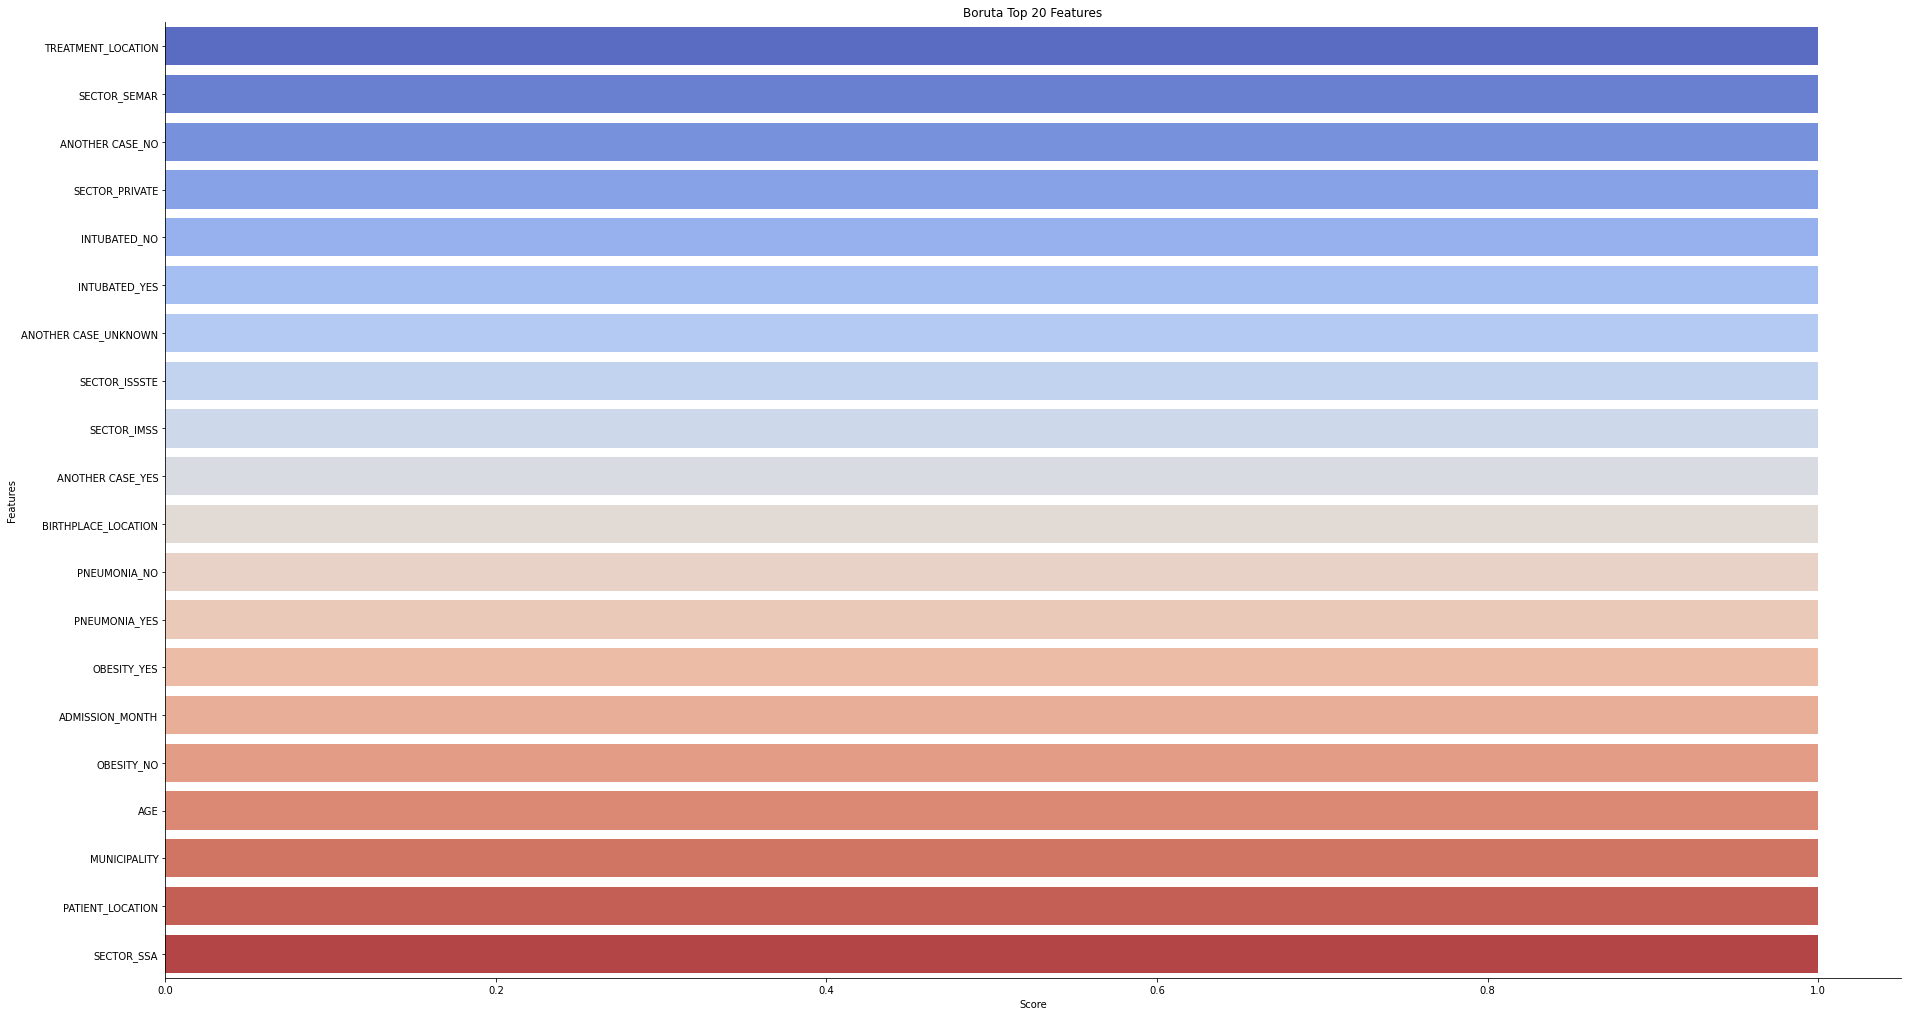

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

In [43]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [44]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [47]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)
pd.DataFrame.to_csv(rfe_score, 'RFE_Scores.csv')

Text(0.5, 1.0, 'RFE Top 20 Features')

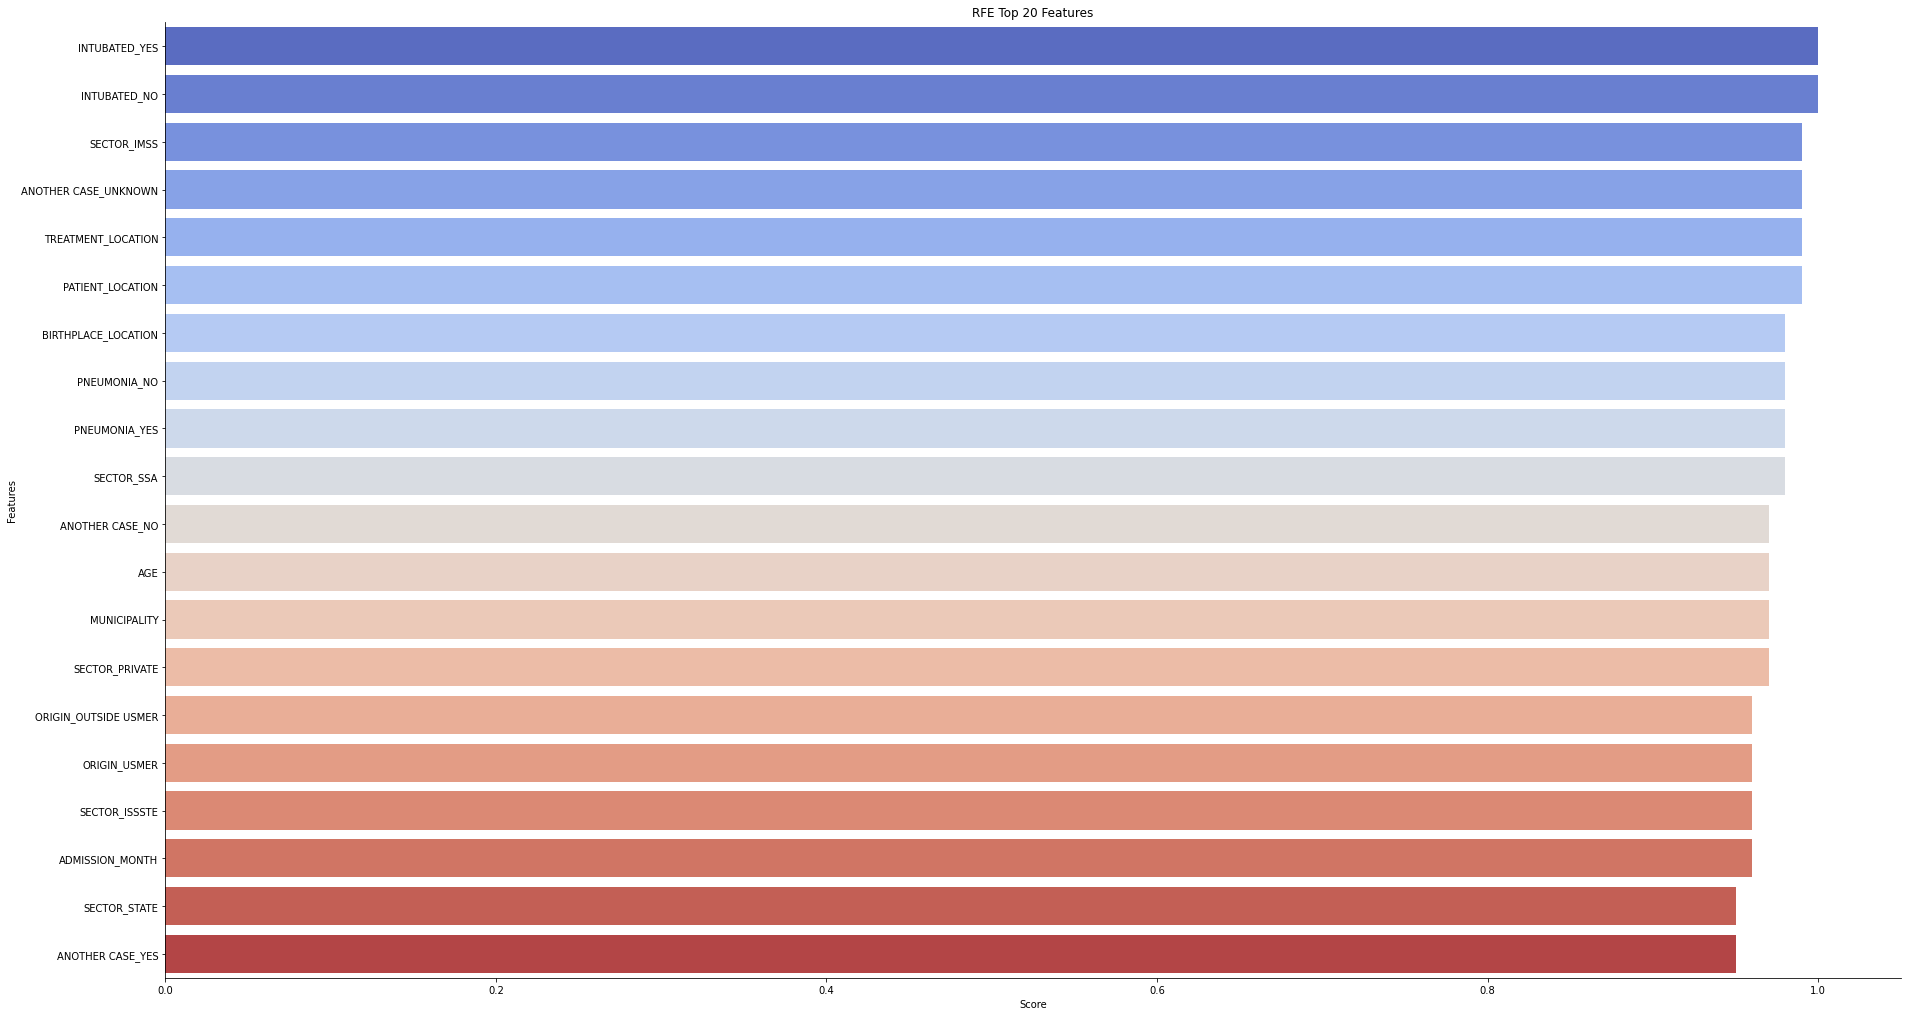

In [46]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

### Question 9

In [40]:
## Question 9

## Top N features of BORUTA
top_20_features = boruta_score.Features[:20].tolist()
top_20_features

['TREATMENT_LOCATION',
 'SECTOR_PRIVATE',
 'PATIENT_LOCATION',
 'INTUBATED_NO',
 'INTUBATED_YES',
 'ANOTHER CASE_NO',
 'PNEUMONIA_NO',
 'ANOTHER CASE_UNKNOWN',
 'SECTOR_SSA',
 'ANOTHER CASE_YES',
 'SECTOR_SEMAR',
 'SECTOR_IMSS',
 'SECTOR_ISSSTE',
 'AGE',
 'ORIGIN_USMER',
 'PNEUMONIA_YES',
 'OBESITY_NO',
 'OBESITY_YES',
 'SECTOR_SEDENA',
 'ADMISSION DATE_2020-04-06']

In [41]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9228965112870126
Top  6 features :  0.9227987882341444
Top  7 features :  0.9213329424411218
Top  8 features :  0.9199648197009674
Top  9 features :  0.9229942343398808
Top  10 features :  0.9222124499169354
Top  11 features :  0.9235805726570898
Top  12 features :  0.9226033421284081
Top  13 features :  0.9255350337144532
Top  14 features :  0.9246555262386397
Top  15 features :  0.9240691879214307
Top  16 features :  0.9239714648685625
Top  17 features :  0.9244600801329034
Top  18 features :  0.9239714648685625
Top  19 features :  0.9248509723443761
Top  20 features :  0.9244600801329034


Text(0.5, 1.0, 'Score for Top N Features of Boruta')

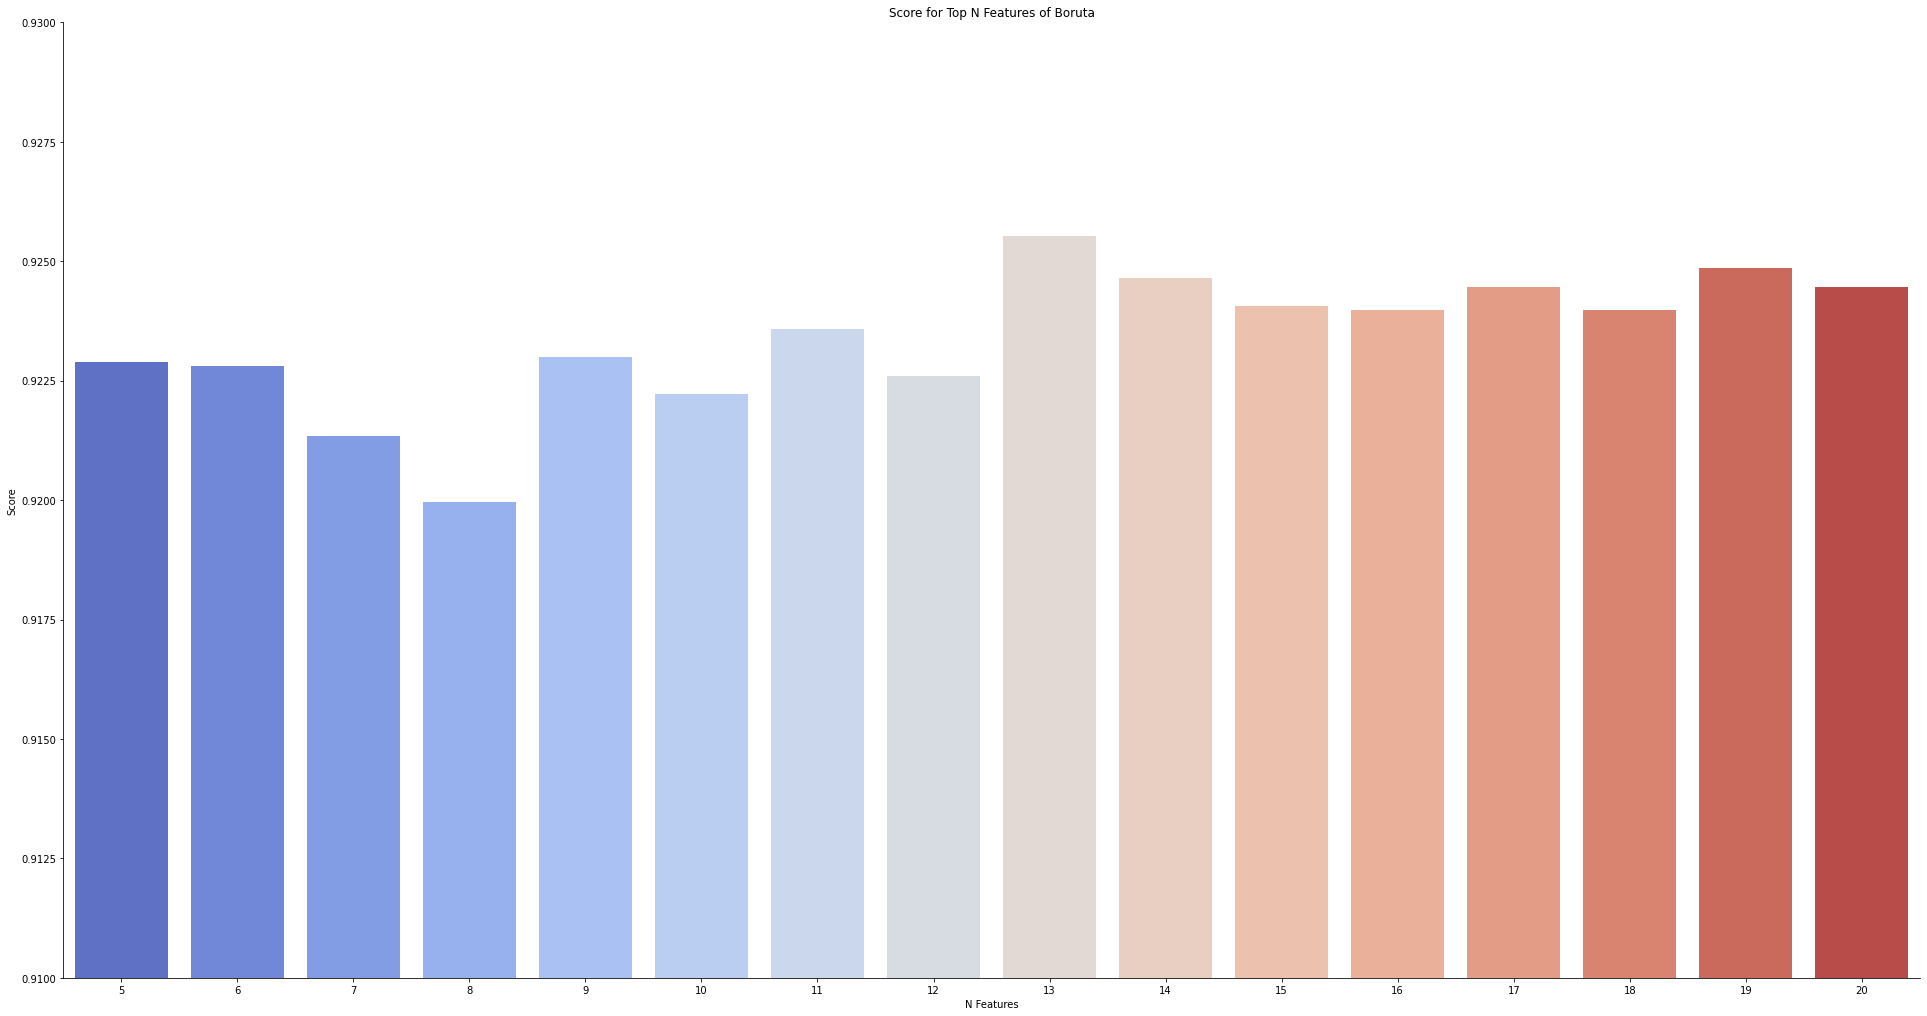

In [42]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of Boruta")

In [43]:
## Top N features of RFE
rfe_score
top_20_features = rfe_score.Features[:20].tolist()
top_20_features

['INTUBATED_NO',
 'SECTOR_IMSS',
 'INTUBATED_YES',
 'TREATMENT_LOCATION',
 'PATIENT_LOCATION',
 'ANOTHER CASE_UNKNOWN',
 'PNEUMONIA_NO',
 'SECTOR_SSA',
 'PNEUMONIA_YES',
 'SECTOR_PRIVATE',
 'ANOTHER CASE_NO',
 'AGE',
 'SECTOR_ISSSTE',
 'ORIGIN_OUTSIDE USMER',
 'ORIGIN_USMER',
 'SECTOR_STATE',
 'ANOTHER CASE_YES',
 'SECTOR_SEDENA',
 'OBESITY_NO',
 'OBESITY_YES']

In [44]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9221147268640673
Top  6 features :  0.9227010651812763
Top  7 features :  0.9218215577054627
Top  8 features :  0.9212352193882537
Top  9 features :  0.9222124499169354
Top  10 features :  0.92250561907554
Top  11 features :  0.9216261115997264
Top  12 features :  0.9218215577054627
Top  13 features :  0.9251441415029805
Top  14 features :  0.924264634027167
Top  15 features :  0.9243623570800352
Top  16 features :  0.9270008795074758
Top  17 features :  0.9249486953972442
Top  18 features :  0.9249486953972442
Top  19 features :  0.9254373106615851
Top  20 features :  0.9246555262386397


Text(0.5, 1.0, 'Score for Top N Features of RFE')

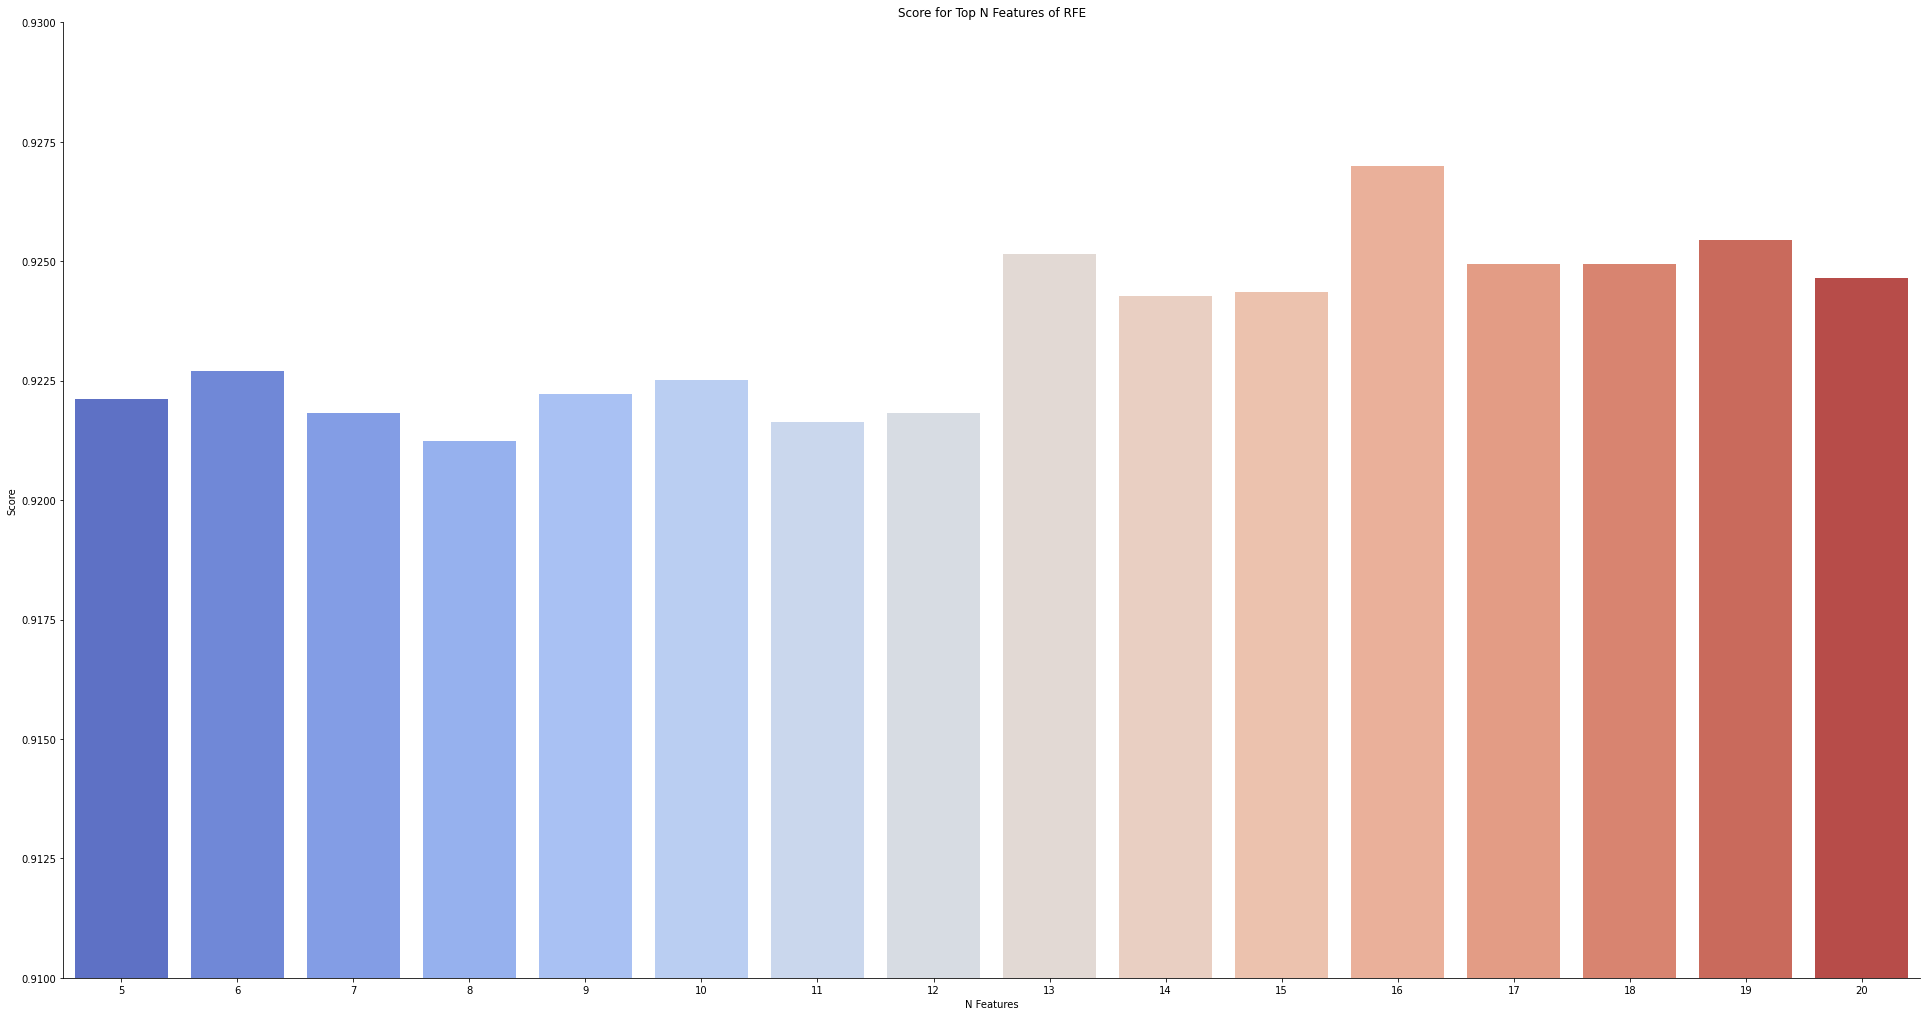

In [45]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of RFE")

### Question 10

In [105]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [164]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [165]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.822


In [166]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[11714  2289]
 [  437   910]]
**********************
Mjority TN=  11714
Mjority FP= 2289
Mjority FN=  437
Mjority TP=  910
**********************
Precision= 0.28
Recall= 0.68
F1= 0.40
Accuracy= 0.82


In [167]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.82


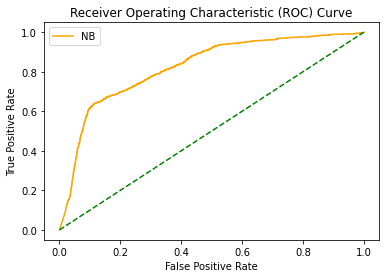

In [168]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 11

In [169]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [170]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [171]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.913


In [172]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[14003     0]
 [ 1340     7]]
**********************
Mjority TN=  14003
Mjority FP= 0
Mjority FN=  1340
Mjority TP=  7
**********************
Precision= 1.00
Recall= 0.01
F1= 0.01
Accuracy= 0.91


In [173]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.88


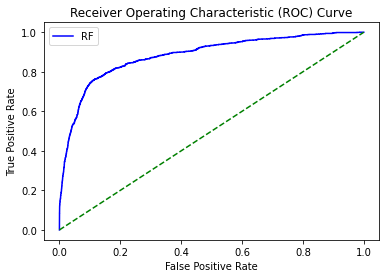

In [174]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 12

In [175]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [176]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.914


In [177]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[13727   276]
 [ 1045   302]]
**********************
Mjority TN=  13727
Mjority FP= 276
Mjority FN=  1045
Mjority TP=  302
**********************
Precision= 0.52
Recall= 0.22
F1= 0.31
Accuracy= 0.91


In [178]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.73


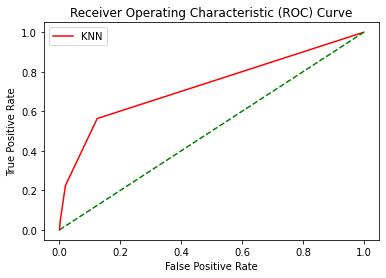

In [179]:
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 13

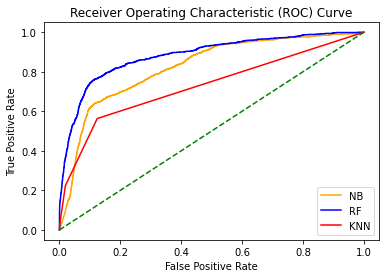

In [180]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

## Question 14

In [129]:
## Question 14
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['ICU'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['ICU']==0]))
print("Number of subscription",len(os_data_y[os_data_y['ICU']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['ICU']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['ICU']==1])/len(os_data_X))

length of oversampled data is  65014
Number of no subscription in oversampled data 32507
Number of subscription 32507
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [130]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [141]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

In [142]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [143]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.923


In [144]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[9517  137]
 [1361 8490]]
**********************
Mjority TN=  9517
Mjority FP= 137
Mjority FN=  1361
Mjority TP=  8490
**********************
Precision= 0.98
Recall= 0.86
F1= 0.92
Accuracy= 0.92


In [145]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.95


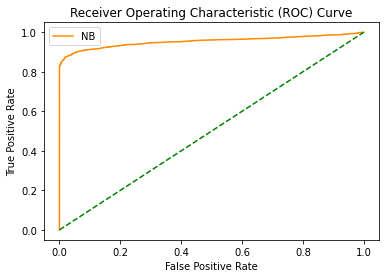

In [159]:
smote_fpr_NB, smote_tpr_NB, smote_thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(smote_fpr_NB, smote_tpr_NB, color='darkorange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [147]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [149]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.906


In [150]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[9042  612]
 [1226 8625]]
**********************
Mjority TN=  9042
Mjority FP= 612
Mjority FN=  1226
Mjority TP=  8625
**********************
Precision= 0.93
Recall= 0.88
F1= 0.90
Accuracy= 0.91


In [151]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.95


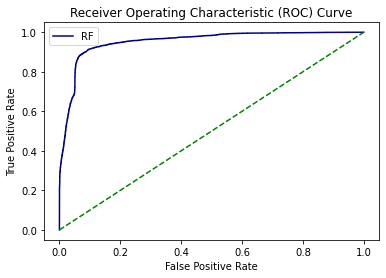

In [160]:
smote_fpr_RF, smote_tpr_RF, smote_thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(smote_fpr_RF, smote_tpr_RF, color='darkblue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [153]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [154]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.959
Accuracy on test set: 0.924


In [155]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[8221 1433]
 [  42 9809]]
**********************
Mjority TN=  8221
Mjority FP= 1433
Mjority FN=  42
Mjority TP=  9809
**********************
Precision= 0.87
Recall= 1.00
F1= 0.93
Accuracy= 0.92


In [156]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.96


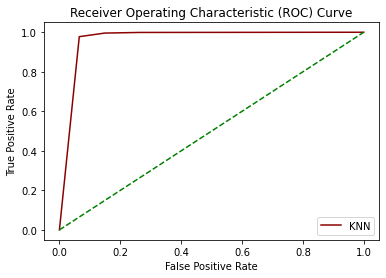

In [161]:
smote_fpr_KNN, smote_tpr_KNN, smote_thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(smote_fpr_KNN, smote_tpr_KNN, color='darkred', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

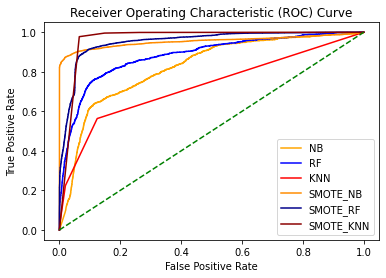

In [181]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot(smote_fpr_NB, smote_tpr_NB, color='darkorange', label='SMOTE_NB')
plt.plot(smote_fpr_RF, smote_tpr_RF, color='darkblue', label='SMOTE_RF')
plt.plot(smote_fpr_KNN, smote_tpr_KNN, color='darkred', label='SMOTE_KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()